In [ ]:
#cu
import requests
import pandas as pd 

cu_url = "https://www.pocketcu.co.kr/api/store/search/list"
#147까지 존재 
cu_payload = {"firstRowNum" : "1",
"searchWord": "서울"}

head = {"user-agent":
"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36"}

r = requests.post(cu_url, json=cu_payload, headers=head)

cu_list = list()

for x in range(0, 148):
    cu_payload['firstRowNum'] = x
    r = requests.post(cu_url, json=cu_payload, headers=head)
    cu_list.extend(r.json()['storeList'])

cu_df = pd.DataFrame(cu_list)
cu_df_seoul = cu_df[cu_df['addrFst'].str.find("서울특별시") > -1].copy()
cu_df_seoul['gu'] = cu_df_seoul['addrFst'].apply(lambda x : x.split()[1])

In [1]:
#csv파일 읽기
import pandas as pd
cu_df = pd.read_csv("./cu.csv", encoding='utf-8')

In [3]:
cu_df

,storeCd,storeNm,fcCd,slcCd,hangCd,bumunCd,teamCd,scCd,openYmd,closeYmd,...,plusSvcUseYn,storeplusYn,exceptStoreCdList,directYn,stockCdcYn,alcProdYn,alcCenterYn,centerReserveYn,onItemNo,gu
0,45047,419사거리점,NaN,NaN,11,NaN,NaN,NaN,20230110,NaN,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강북구
1,49985,41타워점,NaN,NaN,11,NaN,NaN,NaN,20240726,NaN,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,양천구
2,32354,63빌딩점,NaN,NaN,11,NaN,NaN,NaN,20180709,NaN,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,영등포구
3,39418,BGF사옥점,NaN,NaN,11,NaN,NaN,NaN,20210315,NaN,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남구
4,44027,BNK금융타워점,NaN,NaN,11,NaN,NaN,NaN,20220831,NaN,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,영등포구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,2561,흑석명수대점,NaN,NaN,11,NaN,NaN,NaN,20000331,NaN,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,동작구
2904,46717,흑석센트레빌점,NaN,NaN,11,NaN,NaN,NaN,20230731,NaN,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,동작구
2905,17576,흑석현대점,NaN,NaN,11,NaN,NaN,NaN,20120419,NaN,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,동작구
2906,49198,희윤이네편의점,NaN,NaN,11,NaN,NaN,NaN,20240429,NaN,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,영등포구


In [5]:
#시리즈이므로
cu_df.iloc[0]['storeCd']

np.int64(45047)

In [16]:
#결측치 처리
import numpy as np 
np.isnan(cu_df.iloc[0]['fcCd']) == True

np.True_

In [7]:
cu_df.iloc[0].items()

In [17]:
for key, val in cu_df.iloc[0].items():
    try:
        if np.isnan(val) == True:
            continue
    except:
        print(key, val)

storeNm 419사거리점
useYn Y
hour24Yn Y
friedYn N
bakeryYn N
coffeeYn Y
lottoYn N
totoYn N
atmYn Y
deliveryYn Y
jumpoMultiDeviceYn N
jumpoPosCashYn N
jumpoBatteryYn N
jumpoDelivYn N
jumpoPickYn Y
carpickYn N
reserveYn N
cookYn N
wineYn N
medicineYn N
tpiratesYn N
pickNYn N
namaneYn N
printingBoxYn N
deliveryPickYn Y
batteryStationYn N
pickNRYn N
storageYn N
exchangeYn N
taxRefundYn N
addrFst 서울특별시 강북구 삼양로139길
addrDetail 8, (우이동)
myFrequentStoreYn N
isShow Y
smartYn N
childMealPickUpYn N
storeplusYn N
gu 강북구


In [21]:
for x in cu_df.iloc[0].keys():
    print(x , end=', ')

storeCd, storeNm, fcCd, slcCd, hangCd, bumunCd, teamCd, scCd, openYmd, closeYmd, storeOwnerNm, juminNo, storeTelNo, storeSaupNo, posId, provId, unyoungId, useYn, applYmd, oldStoreCd, newStoreCd, fcType2, hangCd1, hangCd2, hangCd3, zipNo, storeAddr1, storeAddr2, doroZipNo, doroStoreAddr1, doroStoreAddr2, latVal, longVal, preStoreCd, hour24Yn, friedYn, bakeryYn, coffeeYn, lottoYn, totoYn, atmYn, storeDscr, deliveryYn, jumpoMultiDeviceYn, jumpoPosCashYn, jumpoBatteryYn, jumpoDelivYn, jumpoPickYn, carpickYn, reserveYn, cookYn, wineYn, medicineYn, tpiratesYn, pickNYn, namaneYn, printingBoxYn, deliveryPickYn, batteryStationYn, pickNRYn, storageYn, exchangeYn, taxRefundYn, custId, addrFst, addrDetail, recomScoreAvg, reviewCnt, myFrequentStoreYn, distance, evtCd, orderBy, firstRowNum, fetchRowCnt, filterSvcList, filterSpcList, filterAdtList, searchWord, searchHangCd1, searchHangCd2, stock, searchStock, cartList, storeType, svcId, svcComCd, isShow, delivYn, pickYn, delivStopYn, pickStopYn, area

In [23]:
#모든 행 출력
pd.set_option('display.max_rows', None)
#null값인 것들을 합해줘 = 합한 값이 전체 행 수와 같으면 해당 속성은 아예 null값으로만 구성되어 있는 것임ㅇ
cu_df.isnull().sum() 

storeCd                  0
storeNm                  0
fcCd                  2908
slcCd                 2908
hangCd                   0
bumunCd               2908
teamCd                2908
scCd                  2908
openYmd                  0
closeYmd              2907
storeOwnerNm          2908
juminNo               2908
storeTelNo            1184
storeSaupNo           2908
posId                 2908
provId                2908
unyoungId             2908
useYn                    0
applYmd                  0
oldStoreCd            2908
newStoreCd            2908
fcType2               2908
hangCd1               2908
hangCd2                  0
hangCd3               2908
zipNo                    0
storeAddr1            2908
storeAddr2            2908
doroZipNo                0
doroStoreAddr1        2908
doroStoreAddr2        2908
latVal                   0
longVal                  0
preStoreCd            2908
hour24Yn                 0
friedYn                  0
bakeryYn                 0
c

help(cu_df.dropna)

dropna(axis=O, how='any', thresh=None, subset=None, inplace=False)

axis : 0이면 결측값이 포함된 행을 삭제하고 1이면 결측값이 포함된 열을삭제
how : 'any’이면 결측값이 존재하는 모든 행/열 삭제, ‘all’이면 모든 값이 결측값일 때 삭제
thresh : 정숫값을 지정하면 결측값이 아닌 값이 그보다 많을 때 행 또는 열을 유지
subset : 어떤 레이블에 결측값이 존재하면 삭제할지 정의
inplace : True이면 데이터에 바로 반영

In [24]:
#모든 값이 결측값일때, axis=1(속성값을) 삭제하고 반영해줘
cu_df.dropna(how='all', axis=1, inplace=True)

In [25]:
pd.set_option('display.max_rows', 100) # 모든 행 출력
pd.set_option('display.max_columns', None) # 모든 행 출력
cu_df.head(3)

,storeCd,storeNm,hangCd,openYmd,closeYmd,storeTelNo,useYn,applYmd,hangCd2,zipNo,doroZipNo,latVal,longVal,hour24Yn,friedYn,bakeryYn,coffeeYn,lottoYn,totoYn,atmYn,deliveryYn,jumpoMultiDeviceYn,jumpoPosCashYn,jumpoBatteryYn,jumpoDelivYn,jumpoPickYn,carpickYn,reserveYn,cookYn,wineYn,medicineYn,tpiratesYn,pickNYn,namaneYn,printingBoxYn,deliveryPickYn,batteryStationYn,pickNRYn,storageYn,exchangeYn,taxRefundYn,addrFst,addrDetail,recomScoreAvg,reviewCnt,myFrequentStoreYn,distance,firstRowNum,fetchRowCnt,isShow,areaTplNo,smartYn,childMealPickUpYn,storeplusYn,gu
0,45047,419사거리점,11,20230110,NaN,NaN,Y,20240401,11305,1010,1010,37.649414,127.013301,Y,N,N,Y,N,N,Y,Y,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,서울특별시 강북구 삼양로139길,"8, (우이동)",5.0,6,N,0.0,0,0,Y,0,N,N,N,강북구
1,49985,41타워점,11,20240726,NaN,NaN,Y,20240727,11470,7997,7997,37.528184,126.875786,Y,N,N,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,서울특별시 양천구 목동동로,293 현대41타워 (목동) 현대41타워,5.0,5,N,0.0,0,0,Y,0,N,N,N,양천구
2,32354,63빌딩점,11,20180709,NaN,027806535,Y,20240622,11560,7345,7345,37.519730,126.939874,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,서울특별시 영등포구 63로,"50, 하(여의도동)",5.0,21,N,0.0,0,0,Y,0,N,N,N,영등포구


In [26]:
#storeplusYn = 행사중
cu_df[(cu_df.storeplusYn == "Y") & (cu_df.gu == '금천구')]

,storeCd,storeNm,hangCd,openYmd,closeYmd,storeTelNo,useYn,applYmd,hangCd2,zipNo,doroZipNo,latVal,longVal,hour24Yn,friedYn,bakeryYn,coffeeYn,lottoYn,totoYn,atmYn,deliveryYn,jumpoMultiDeviceYn,jumpoPosCashYn,jumpoBatteryYn,jumpoDelivYn,jumpoPickYn,carpickYn,reserveYn,cookYn,wineYn,medicineYn,tpiratesYn,pickNYn,namaneYn,printingBoxYn,deliveryPickYn,batteryStationYn,pickNRYn,storageYn,exchangeYn,taxRefundYn,addrFst,addrDetail,recomScoreAvg,reviewCnt,myFrequentStoreYn,distance,firstRowNum,fetchRowCnt,isShow,areaTplNo,smartYn,childMealPickUpYn,storeplusYn,gu
57,48737,가산ENC7점,11,20240226,NaN,0263304777,Y,20240701,11545,8512,8512,37.479950,126.887021,N,N,N,Y,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,서울특별시 금천구 디지털로9길,"46, 이엔씨드림타워7차아파트 (가산동)",5.0,1,N,0.0,0,0,Y,0,N,N,Y,금천구
76,14512,가산에스케이점,11,20101208,NaN,07041562481,Y,20240304,11545,8589,8589,37.475625,126.883445,N,N,N,Y,N,N,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,서울특별시 금천구 가산디지털1로,"119, 에스케이트윈테크타워 비동(가산동) 1층 B동 102호",4.5,9,N,0.0,0,0,Y,0,N,N,Y,금천구
83,38197,가산하이엔드6차점,11,20200929,NaN,NaN,Y,20240701,11545,8513,8513,37.475730,126.885797,N,N,N,Y,N,N,Y,Y,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,서울특별시 금천구 벚꽃로 234 (가산동),에이스하이엔드타워6차,4.8,6,N,0.0,0,0,Y,0,N,N,Y,금천구
481,39811,금천블르빌점,11,20210429,NaN,NaN,Y,20240701,11545,8619,8619,37.463732,126.899744,Y,N,N,Y,N,N,Y,Y,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,서울특별시 금천구 시흥대로98길,"30 (독산동, 롯데블르빌) 롯데블르빌",5.0,22,N,0.0,0,0,Y,0,N,N,Y,금천구
490,40018,금천파크점,11,20210521,NaN,02-807-3965,Y,20231201,11545,8561,8561,37.465075,126.906541,Y,Y,N,Y,N,N,Y,Y,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,서울특별시 금천구 독산로58나길,48 유림속셈학원,4.8,39,N,0.0,0,0,Y,0,N,N,Y,금천구
791,48243,독산4동점,11,20231222,NaN,NaN,Y,20240701,11545,8557,8557,37.470304,126.904950,Y,Y,N,Y,N,N,Y,Y,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,서울특별시 금천구 독산로80길,"42, (독산동)",0.0,0,N,0.0,0,0,Y,0,N,N,Y,금천구
812,43022,독산푸르지오점,11,20220512,NaN,NaN,Y,20231214,11545,8548,8548,37.480515,126.909007,Y,Y,N,Y,N,N,N,Y,N,N,N,Y,Y,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,서울특별시 금천구 남부순환로,1424 신림안식일교획 (독산동) 신림안식일교획 1층 102호,4.9,32,N,0.0,0,0,Y,0,N,N,Y,금천구


In [27]:
for x in cu_df.iloc[0].keys():
    print(x , end=', ')

storeCd, storeNm, hangCd, openYmd, closeYmd, storeTelNo, useYn, applYmd, hangCd2, zipNo, doroZipNo, latVal, longVal, hour24Yn, friedYn, bakeryYn, coffeeYn, lottoYn, totoYn, atmYn, deliveryYn, jumpoMultiDeviceYn, jumpoPosCashYn, jumpoBatteryYn, jumpoDelivYn, jumpoPickYn, carpickYn, reserveYn, cookYn, wineYn, medicineYn, tpiratesYn, pickNYn, namaneYn, printingBoxYn, deliveryPickYn, batteryStationYn, pickNRYn, storageYn, exchangeYn, taxRefundYn, addrFst, addrDetail, recomScoreAvg, reviewCnt, myFrequentStoreYn, distance, firstRowNum, fetchRowCnt, isShow, areaTplNo, smartYn, childMealPickUpYn, storeplusYn, gu, 

In [28]:
cu_df.drop(['distance'], axis = 1, inplace=True)

In [30]:
from bs4 import BeautifulSoup as BS
import requests
product_url = "https://www.pocketcu.co.kr/store/detail/39418"
r = requests.get(product_url)
bs = BS(r.text)

In [31]:
bs

<!DOCTYPE html>
<html>
<head>
<!-- inc -->
<title>CU 멤버십</title>
<meta charset="utf-8"/>
<meta content="IE=8,IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/>
<meta content="telephone=no, address=no, email=no" name="format-detection"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="default" name="apple-mobile-web-app-status-bar-style"/>
<meta content="true" name="HandheldFriendly"/>
<meta content="" name="title"/>
<meta content="CU 멤버십" name="keywords"/>
<meta content="/images/main/og_03.png" property="og:image"/>
<!-- css -->
<link href="/images/common/favicon.ico" rel="shortcut icon"/>
<link href="/images/common/i120x120_201611041636.png" rel="apple-touch-icon-precomposed"/>
<link href="/images/common/i120x120_201611041636.png" rel="apple-touch-icon-precomposed" sizes="72x72"/>
<link href="/images/common/i144x144_201611041636.png" re

In [37]:
bs.find("div", id="onEventArea")

<div class="swiper-wrapper" id="onEventArea">
</div>

In [44]:
from bs4 import BeautifulSoup as BS
import requests

product_url2 = "https://www.pocketcu.co.kr/api/store/discount/product"

payload = {"storeCd":"22171",
           "delivYn":"Y",
           "delivStopYn":"N",
           "pickYn":"Y",
           "pickStopYn":"N"}

r2 = requests.post(product_url2, json=payload)
r2.json()

{'discountList': []}

할인 품목이 있는 매장만 추출

In [56]:
from tqdm import tqdm

In [57]:
payload = {"storeCd":"22171",
           "delivYn":"Y",
           "delivStopYn":"N",
           "pickYn":"Y",
           "pickStopYn":"N"}

total = []
product_url2 = "https://www.pocketcu.co.kr/api/store/discount/product"

for x in tqdm(cu_df['storeCd']):
    payload['storeCd'] = x
    r2 = requests.post(product_url2, json=payload)
    discntlist = r2.json()['discountList']
    if len(discntlist) == 0:
        continue
    #print(r2.json()['discountList'])
    tmp = pd.DataFrame(r2.json()['discountList'])
    total.append(tmp) 
    break

  0%|                                                                                  | 3/2908 [00:01<28:14,  1.71it/s]

[{'skipPaging': True, 'page': 1, 'pagePerSize': 10, 'totalCnt': 0, 'totalPage': 0, 'fromData': 0, 'toData': 10, 'toPage': 1, 'onItemNo': '2022030012826', 'itemSvcId': '01', 'delivYn': 'Y', 'pickupYn': 'Y', 'presendYn': 'N', 'custGrade': '99', 'saleYn': 'Y', 'prdDispNm': '갸스비)헤어스프레이180g', 'salePrc': 9500, 'tagPrc': 0, 'stockDispYn': 'Y', 'storeCd': '39418', 'stockCnt': 2, 'prd1Img': 'app/product/mst_product/4902806582888_L.jpg', 'saleAreaNo': 0, 'prdInformNo': 0, 'delivFeeNo': 0, 'reviewNo': 0, 'totSaleCnt': 0, 'daySaleCnt': 0, 'onceSaleCnt': 0, 'loginidSaleCnt': 0, 'onceLoginidSaleCnt': 0, 'onceMinSaleCnt': 0, 'buyCnt': 0, 'dayBuyCnt': 0, 'totBuyCnt': 0, 'reviewCnt': 0, 'reviewScore': 0.0, 'eventKeyword': '1+1', 'cartCnt': 0, 'itemCd': '4902806582888', 'flag1': [{'value': '1+1', 'key': '01'}], 'flag3': [], 'flag4': '202511252130', 'soldout': 'N', 'isHideSaleCnt': False, 'productClose': {'storeCd': '39418', 'itemCd': '4902806582888', 'endYmdhms': '202511252300', 'dispEndYmdhms': '202511

In [54]:
len(r2.json()['discountList']) == 0

True

In [49]:
cu_df['storeCd']

0       45047
1       49985
2       32354
3       39418
4       44027
        ...  
2903     2561
2904    46717
2905    17576
2906    49198
2907     1800
Name: storeCd, Length: 2908, dtype: int64

In [51]:
for x in cu_df['storeCd']:
    print(x)
    break

45047


In [66]:
cu_df.head(3)

,storeCd,storeNm,hangCd,openYmd,closeYmd,storeTelNo,useYn,applYmd,hangCd2,zipNo,doroZipNo,latVal,longVal,hour24Yn,friedYn,bakeryYn,coffeeYn,lottoYn,totoYn,atmYn,deliveryYn,jumpoMultiDeviceYn,jumpoPosCashYn,jumpoBatteryYn,jumpoDelivYn,jumpoPickYn,carpickYn,reserveYn,cookYn,wineYn,medicineYn,tpiratesYn,pickNYn,namaneYn,printingBoxYn,deliveryPickYn,batteryStationYn,pickNRYn,storageYn,exchangeYn,taxRefundYn,addrFst,addrDetail,recomScoreAvg,reviewCnt,myFrequentStoreYn,firstRowNum,fetchRowCnt,isShow,areaTplNo,smartYn,childMealPickUpYn,storeplusYn,gu
0,45047,419사거리점,11,20230110,NaN,NaN,Y,20240401,11305,1010,1010,37.649414,127.013301,Y,N,N,Y,N,N,Y,Y,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,서울특별시 강북구 삼양로139길,"8, (우이동)",5.0,6,N,0,0,Y,0,N,N,N,강북구
1,49985,41타워점,11,20240726,NaN,NaN,Y,20240727,11470,7997,7997,37.528184,126.875786,Y,N,N,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,서울특별시 양천구 목동동로,293 현대41타워 (목동) 현대41타워,5.0,5,N,0,0,Y,0,N,N,N,양천구
2,32354,63빌딩점,11,20180709,NaN,027806535,Y,20240622,11560,7345,7345,37.519730,126.939874,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,서울특별시 영등포구 63로,"50, 하(여의도동)",5.0,21,N,0,0,Y,0,N,N,N,영등포구


In [59]:
cu_df.columns

Index(['storeCd', 'storeNm', 'hangCd', 'openYmd', 'closeYmd', 'storeTelNo',
       'useYn', 'applYmd', 'hangCd2', 'zipNo', 'doroZipNo', 'latVal',
       'longVal', 'hour24Yn', 'friedYn', 'bakeryYn', 'coffeeYn', 'lottoYn',
       'totoYn', 'atmYn', 'deliveryYn', 'jumpoMultiDeviceYn', 'jumpoPosCashYn',
       'jumpoBatteryYn', 'jumpoDelivYn', 'jumpoPickYn', 'carpickYn',
       'reserveYn', 'cookYn', 'wineYn', 'medicineYn', 'tpiratesYn', 'pickNYn',
       'namaneYn', 'printingBoxYn', 'deliveryPickYn', 'batteryStationYn',
       'pickNRYn', 'storageYn', 'exchangeYn', 'taxRefundYn', 'addrFst',
       'addrDetail', 'recomScoreAvg', 'reviewCnt', 'myFrequentStoreYn',
       'firstRowNum', 'fetchRowCnt', 'isShow', 'areaTplNo', 'smartYn',
       'childMealPickUpYn', 'storeplusYn', 'gu'],
      dtype='object')

In [64]:
for x in cu_df.columns:
    print(x + '= Column(),')

storeCd= Column(),
storeNm= Column(),
hangCd= Column(),
openYmd= Column(),
closeYmd= Column(),
storeTelNo= Column(),
useYn= Column(),
applYmd= Column(),
hangCd2= Column(),
zipNo= Column(),
doroZipNo= Column(),
latVal= Column(),
longVal= Column(),
hour24Yn= Column(),
friedYn= Column(),
bakeryYn= Column(),
coffeeYn= Column(),
lottoYn= Column(),
totoYn= Column(),
atmYn= Column(),
deliveryYn= Column(),
jumpoMultiDeviceYn= Column(),
jumpoPosCashYn= Column(),
jumpoBatteryYn= Column(),
jumpoDelivYn= Column(),
jumpoPickYn= Column(),
carpickYn= Column(),
reserveYn= Column(),
cookYn= Column(),
wineYn= Column(),
medicineYn= Column(),
tpiratesYn= Column(),
pickNYn= Column(),
namaneYn= Column(),
printingBoxYn= Column(),
deliveryPickYn= Column(),
batteryStationYn= Column(),
pickNRYn= Column(),
storageYn= Column(),
exchangeYn= Column(),
taxRefundYn= Column(),
addrFst= Column(),
addrDetail= Column(),
recomScoreAvg= Column(),
reviewCnt= Column(),
myFrequentStoreYn= Column(),
firstRowNum= Column(),
fetc

CU 크롤링 DB 적재

In [69]:
import sqlalchemy
from urllib import parse

user = 'encore'
password = '1234'
host='127.0.0.1'
port = 3306
database = 'encore'
password = parse.quote_plus(password)
engine = sqlalchemy.create_engine(f"mysql://{user}:{password}@{host}:{port}/{database}")

try:
    with engine.connect() as connection:
        print("Database connection successful!")
except Exception as e:
    print(f"Database connection failed: {e}")

Database connection successful!


In [73]:
base.metadata.drop_all(engine)

In [74]:
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, DECIMAL, Date, Float, Boolean

from sqlalchemy.orm import DeclarativeBase
from sqlalchemy.orm import mapped_column


class Base(DeclarativeBase):
    pass


class Stock(Base):
    __tablename__  = 'cu'

    storeCd = Column(String(10), primary_key=True)
    storeNm = Column(String(30))
    hangCd  = Column(Integer)
    openYmd = Column(Date)
    closeYmd = Column(Date)
    storeTelNo = Column(String(30))
    useYn = Column(Boolean)
    applYmd = Column(Date)
    hangCd2 = Column(Integer)
    zipNo = Column(Integer)
    doroZipNo = Column(Integer)
    latVal = Column(Float)
    longVal = Column(Float)
    hour24Yn = Column(Boolean)
    friedYn = Column(Boolean)
    bakeryYn = Column(Boolean)
    coffeeYn = Column(Boolean)
    lottoYn = Column(Boolean)
    totoYn = Column(Boolean)
    atmYn = Column(Boolean)
    deliveryYn = Column(Boolean)
    jumpoMultiDeviceYn = Column(Boolean)
    jumpoPosCashYn = Column(Boolean)
    jumpoBatteryYn = Column(Boolean)
    jumpoDelivYn = Column(Boolean)
    jumpoPickYn = Column(Boolean)
    carpickYn = Column(Boolean)
    reserveYn = Column(Boolean)
    cookYn = Column(Boolean)
    wineYn = Column(Boolean)
    medicineYn = Column(Boolean)
    tpiratesYn = Column(Boolean)
    pickNYn = Column(Boolean)
    namaneYn = Column(Boolean)
    printingBoxYn = Column(Boolean)
    deliveryPickYn = Column(Boolean)
    batteryStationYn = Column(Boolean)
    pickNRYn = Column(Boolean)
    storageYn = Column(Boolean)
    exchangeYn = Column(Boolean)
    taxRefundYn = Column(Boolean)
    addrFst = Column(String(50))
    addrDetail = Column(String(100))
    recomScoreAvg = Column(Float)
    reviewCnt = Column(Integer)
    myFrequentStoreYn = Column(Boolean)
    firstRowNum = Column(Integer)
    fetchRowCnt = Column(Integer)
    isShow = Column(Boolean)
    areaTplNo = Column(Boolean)
    smartYn = Column(Boolean)
    childMealPickUpYn = Column(Boolean)
    storeplusYn = Column(Boolean)
    gu = Column(String(20))


base = Base()
base.metadata.create_all(engine)

In [77]:
base = Base()
base.metadata.create_all(engine)
cu_df.replace("Y", 1, inplace=True)
cu_df.replace("N", 0, inplace=True)

cu_df.to_sql('cu', if_exists='append', index=False, con=engine)

/tmp/ipykernel_396/70360405.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cu_df.replace("Y", 1, inplace=True)
/tmp/ipykernel_396/70360405.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cu_df.replace("N", 0, inplace=True)


2908

In [81]:
#cu_df.sort_values(by=['openYmd', 'storeCd'], ascending=[False, True])

In [85]:
cu_df['ym'] = cu_df.openYmd.apply(lambda x : str(x)[:6]) 

In [86]:
cu_df.groupby(['ym'])['storeCd'].count()

ym
199806     1
199910     1
200002     1
200003     1
200008     1
          ..
202407    50
202408    35
202409    27
202410    30
202411     9
Name: storeCd, Length: 263, dtype: int64

<Axes: xlabel='ym'>

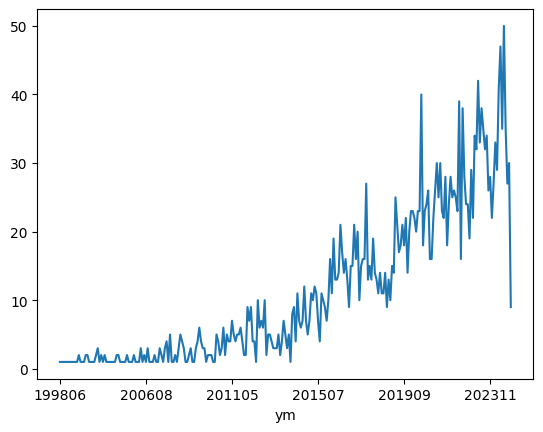

In [87]:
cu_df.groupby(['ym'])['storeCd'].count().plot()

<Axes: xlabel='ym'>

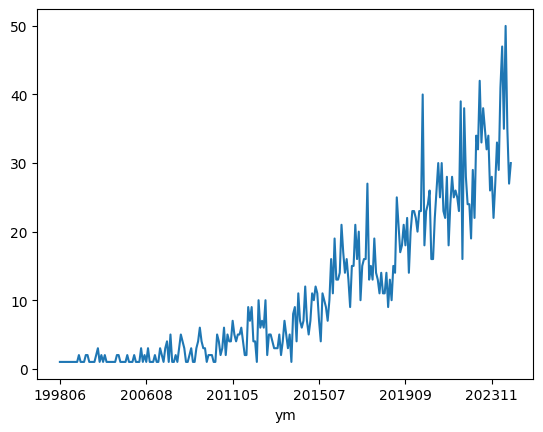

In [88]:
cu_df.groupby(['ym'])['storeCd'].count()[:-1].plot()

In [89]:
cu_df.head(1)

,storeCd,storeNm,hangCd,openYmd,closeYmd,storeTelNo,useYn,applYmd,hangCd2,zipNo,doroZipNo,latVal,longVal,hour24Yn,friedYn,bakeryYn,coffeeYn,lottoYn,totoYn,atmYn,deliveryYn,jumpoMultiDeviceYn,jumpoPosCashYn,jumpoBatteryYn,jumpoDelivYn,jumpoPickYn,carpickYn,reserveYn,cookYn,wineYn,medicineYn,tpiratesYn,pickNYn,namaneYn,printingBoxYn,deliveryPickYn,batteryStationYn,pickNRYn,storageYn,exchangeYn,taxRefundYn,addrFst,addrDetail,recomScoreAvg,reviewCnt,myFrequentStoreYn,firstRowNum,fetchRowCnt,isShow,areaTplNo,smartYn,childMealPickUpYn,storeplusYn,gu,ym
0,45047,419사거리점,11,20230110,NaN,NaN,1,20240401,11305,1010,1010,37.649414,127.013301,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,서울특별시 강북구 삼양로139길,"8, (우이동)",5.0,6,0,0,0,1,0,0,0,0,강북구,202301


In [90]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [101]:
import folium
#시작 위치, 지도유형
cu_map = folium.Map(location = [37.55, 126.98], tiles='Cartodb Positron', zoom_start=12)

In [107]:
#latVal	longVal 2개이상일때는 이중 리스트로 가져오기 
for idx, row in cu_df[['storeNm', 'latVal', 'longVal']].iterrows():
    folium.Marker([row['latVal'], row['longVal']], popup=row['storeNm'],
                 icon=folium.Icon(color='green')).add_to(cu_map)

cu_map.save("./cu_map.html")

In [108]:
sql = """SELECT shopName, longs, lat FROM GS25;"""

In [109]:
gs = pd.read_sql_query(sql, con=engine)

In [110]:
for idx, row in gs.iterrows():
    folium.Marker([row['longs'],row['lat']], popup=row['shopName'],
                 icon=folium.Icon(color='blue')).add_to(cu_map)

cu_map.save("./cu_gs_map.html")

In [122]:
seven = "https://www.7-eleven.co.kr/util/storeLayerPop.asp"

payload = {'storeLaySido': '서울',
            'storeLayGu': '광진구',
'hiddentext': 'none'}

r= requests.post(seven, data=payload)

from bs4 import BeautifulSoup as BS

bs = BS(r.text)

tmp = bs.find("div", class_="list_stroe").findAll("li")

In [123]:
tmp

[<li>
 <a href="javascript: document.mapifrmAction.markerClick(0,37.535726348,127.09569228);">
 <span>강변테크노마트점 <img alt="카페" border="0" src="/front/img/util/new/ico_cafe.png"/> <img alt="토토" border="0" src="/front/img/util/new/ico_toto.png"/> <img alt="무인택배접수" border="0" src="/front/img/util/new/ico_parcel.png"/><img alt="FedEx" border="0" src="/front/img/util/new/ico_fedex.png"/> <!-- img src='/front/img/util/new/BBQIcon.png' border='0' alt='치킨의정석' --> <!-- img src='/front/img/util/new/returnIcon.png' border='0' alt='반품접수' -->
 <!--  <img src='/front/img/util/new/pokemonIcon.png' border='0' alt='포켓스탑'> -->
 <!-- img src='/front/img/util/new/cafeIcon_20x20.png' border='0' alt='핫푸드' --> <!-- img src='/front/img/util/new/cafeIcon_20x20.png' border='0' alt='로또' -->
 </span>
 <span>서울 광진구 구의동 광나루로56길  85 지하004호</span>
 <span></span>
 <span>영업 시간 06:00 ~ 01:00</span>
 </a>
 </li>,
 <li>
 <a href="javascript: document.mapifrmAction.markerClick(1,37.537397025,127.09762242);">
 <span>강변프라임점 <i

In [124]:
bs.findAll("div", class_="list_stroe")[1].findAll("li")

[<li>
 <a href="javascript: document.mapifrmAction.markerClick(0,37.535726348,127.09569228);">
 <span>강변테크노마트점 <img alt="카페" border="0" src="/front/img/util/new/ico_cafe.png"/> <img alt="토토" border="0" src="/front/img/util/new/ico_toto.png"/> <img alt="무인택배접수" border="0" src="/front/img/util/new/ico_parcel.png"/><img alt="FedEx" border="0" src="/front/img/util/new/ico_fedex.png"/> <!-- img src='/front/img/util/new/BBQIcon.png' border='0' alt='치킨의정석' --> <!-- img src='/front/img/util/new/returnIcon.png' border='0' alt='반품접수' -->
 <!--  <img src='/front/img/util/new/pokemonIcon.png' border='0' alt='포켓스탑'> -->
 <!-- img src='/front/img/util/new/cafeIcon_20x20.png' border='0' alt='핫푸드' --> <!-- img src='/front/img/util/new/cafeIcon_20x20.png' border='0' alt='로또' -->
 </span>
 <span>서울 광진구 구의동 광나루로56길  85 지하004호</span>
 <span></span>
 <span>영업 시간 06:00 ~ 01:00</span>
 </a>
 </li>,
 <li>
 <a href="javascript: document.mapifrmAction.markerClick(1,37.537397025,127.09762242);">
 <span>강변프라임점 <i

In [125]:
tmp[0]

<li>
<a href="javascript: document.mapifrmAction.markerClick(0,37.535726348,127.09569228);">
<span>강변테크노마트점 <img alt="카페" border="0" src="/front/img/util/new/ico_cafe.png"/> <img alt="토토" border="0" src="/front/img/util/new/ico_toto.png"/> <img alt="무인택배접수" border="0" src="/front/img/util/new/ico_parcel.png"/><img alt="FedEx" border="0" src="/front/img/util/new/ico_fedex.png"/> <!-- img src='/front/img/util/new/BBQIcon.png' border='0' alt='치킨의정석' --> <!-- img src='/front/img/util/new/returnIcon.png' border='0' alt='반품접수' -->
<!--  <img src='/front/img/util/new/pokemonIcon.png' border='0' alt='포켓스탑'> -->
<!-- img src='/front/img/util/new/cafeIcon_20x20.png' border='0' alt='핫푸드' --> <!-- img src='/front/img/util/new/cafeIcon_20x20.png' border='0' alt='로또' -->
</span>
<span>서울 광진구 구의동 광나루로56길  85 지하004호</span>
<span></span>
<span>영업 시간 06:00 ~ 01:00</span>
</a>
</li>

In [126]:
tmp[0].find("span")

<span>강변테크노마트점 <img alt="카페" border="0" src="/front/img/util/new/ico_cafe.png"/> <img alt="토토" border="0" src="/front/img/util/new/ico_toto.png"/> <img alt="무인택배접수" border="0" src="/front/img/util/new/ico_parcel.png"/><img alt="FedEx" border="0" src="/front/img/util/new/ico_fedex.png"/> <!-- img src='/front/img/util/new/BBQIcon.png' border='0' alt='치킨의정석' --> <!-- img src='/front/img/util/new/returnIcon.png' border='0' alt='반품접수' -->
<!--  <img src='/front/img/util/new/pokemonIcon.png' border='0' alt='포켓스탑'> -->
<!-- img src='/front/img/util/new/cafeIcon_20x20.png' border='0' alt='핫푸드' --> <!-- img src='/front/img/util/new/cafeIcon_20x20.png' border='0' alt='로또' -->
</span>

In [129]:
store_name = tmp[0].find("span").text.strip()

In [131]:
tmp[0].find("a")['href']

'javascript: document.mapifrmAction.markerClick(0,37.535726348,127.09569228);'

In [136]:
import re
p = re.compile("[0-9]{2,3}\.[0-9]{7,8}")

In [137]:
p.findall('javascript: document.mapifrmAction.markerClick(0,37.535726348,127.09569228);')

['37.53572634', '127.09569228']

In [138]:
lat, long = p.findall(tmp[0].find("a")['href'])
print(lat, long)

37.53572634 127.09569228


In [169]:
import re
p = re.compile("[0-9]{2,3}\.[0-9]{7,8}")

tmp_total = []
for x in range(len(tmp)):
    total = []
    store_name = tmp[x].find("span").text.strip()
    lat, long = p.findall(tmp[x].find("a")['href'])
    
    total.append(store_name)
    total.append(lat)
    total.append(long)

for x in range(0, len(total)):
    tmp_total.append()
    

In [170]:
total

['S아차산역점', '37.55319346', '127.08830424']